In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs

# custom package
sys.path.append('/home/rrp000/sea_ice/code/')
from icepack import get_dataset
from icepack.analysis import *
from icepack.splot import *

monthletters = ['J','F','M','A','M','J','J','A','S','O','N','D']
monthstr = ['01','02','03','04','05','06','07','08','09','10','11','12']
monthdict = {1:r'$\mathbf{January}$',
             2:r'$\mathbf{February}$',
             3:r'$\mathbf{March}$',
             4:r'$\mathbf{April}$',
             5:r'$\mathbf{May}$',
             6:r'$\mathbf{June}$',
             7:r'$\mathbf{July}$',
             8:r'$\mathbf{August}$',
             9:r'$\mathbf{September}$',
             10:r'$\mathbf{October}$',
             11:r'$\mathbf{November}$',
             12:r'$\mathbf{December}$'}

method = 'mean'
daterange = (2007,2019) # for calculating anomalies
daterange_clim = (2007,2019) # for climatologies

In [12]:
mask = xr.open_dataset("~/sea_ice/data/masks/land_Had2CIS.nc")
data_ni = get_dataset("NSIDC")
data = get_dataset("NSIDC").interp(lon=mask['lon'],lat=mask['lat'],method='nearest')
mask_id=np.nan

In [22]:
mask2 = mask.copy(deep=True)
mask2['lon'] = mask2['lon'] - 0.5

mask3 = xr.merge([mask,mask2])

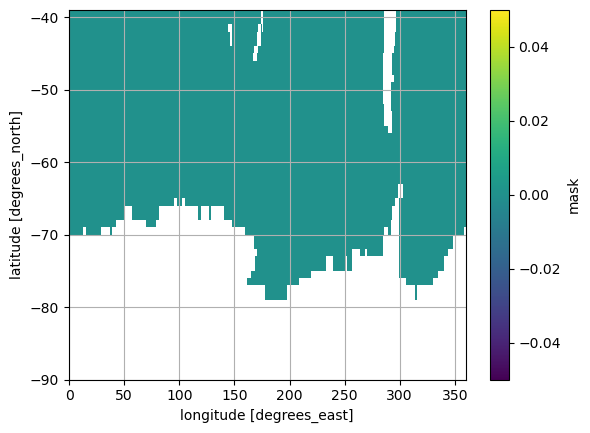

In [31]:
fig,ax=plt.subplots(1,1)
mask3['mask'].plot(ax=ax)
ax.set_ylim(-90,-39)
plt.grid()

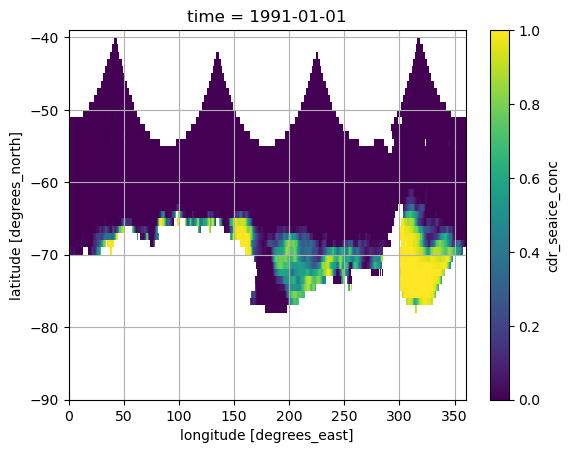

In [34]:
fig,ax=plt.subplots(1,1)
data,mask=xr.align(data,mask,join='inner')
data.where(~np.isnan(mask['mask']),other=np.nan)['cdr_seaice_conc'][0].plot(ax=ax)
ax.set_ylim(-90,-39)
plt.grid()

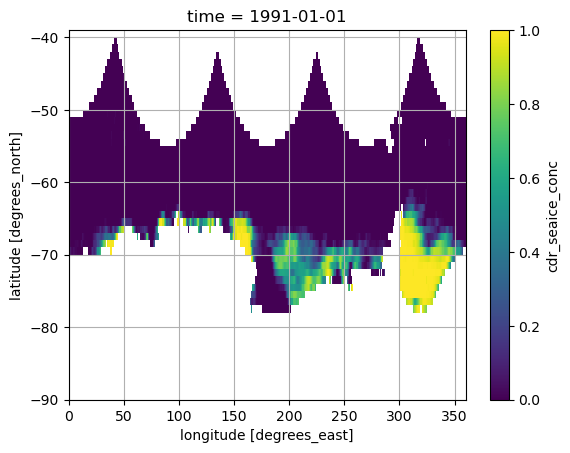

In [18]:
fig,ax=plt.subplots(1,1)
data_ni['cdr_seaice_conc'][0].plot(ax=ax)
ax.set_ylim(-90,-39)
plt.grid()